In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## import data
from scipy.io import loadmat

# data 1
Scurve = loadmat('ScurveData.mat')['data3']  

In [3]:
Scurve.shape

(352, 3)

<IPython.core.display.Javascript object>


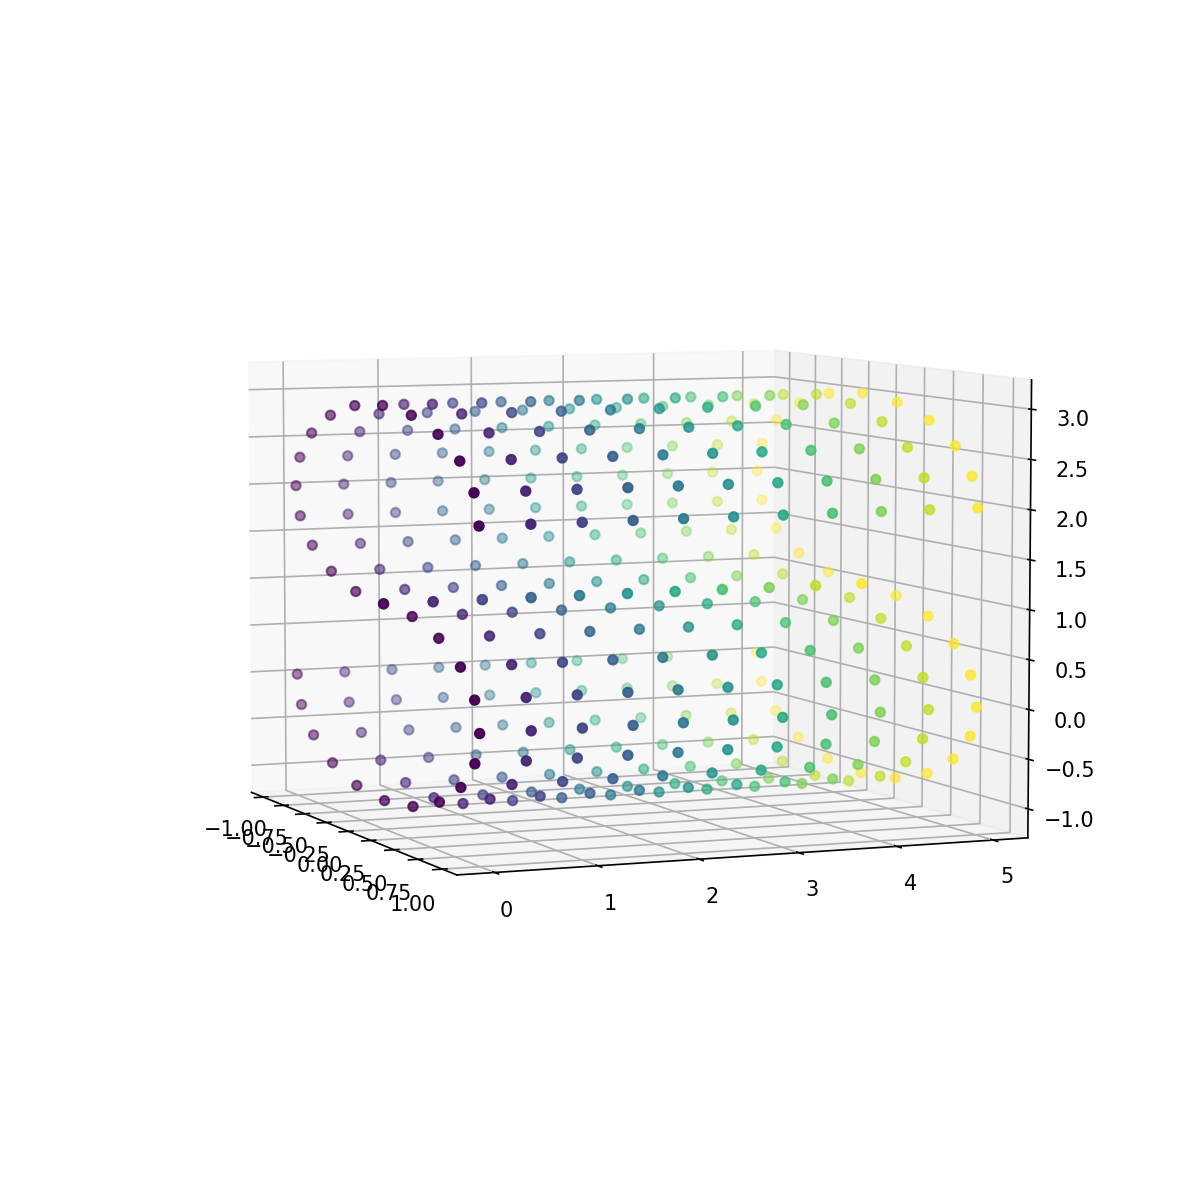

In [6]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(Scurve[:,0],Scurve[:,1],Scurve[:,2],c=Scurve[:,1],cmap='viridis')

In [42]:
# data 2
def dScurve(sig,X=Scurve):
    n,D = Scurve.shape
    
    np.random.seed(211)
    
    pert = sig*np.random.normal(size=(n,D))
    return X + pert

In [8]:
# data 3
emoji = loadmat('FaceData.mat')
face, colors = emoji['data3'], emoji['colors']

I used built-in function for LLE and t-SNE in sklearn.manifold python library

In [9]:
## import methods
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap
from sklearn.decomposition import PCA

In [ ]:
## diffusion map
def myDiffusionMap(X,eps):
    n, D = X.shape
    
    # step 1
    sdmat = np.zeros((n,n))
    for i in range(n):
        sdmat[i,:] = sum((X - X[i,:])**2,axis=1)
    
    # step 2
    if eps is None:
        drowmin = np.zeros(n)
        for i in range(n):
            drowmin[i] = min(sdmat[i,np.setdiff1d(range(n),i)])
        eps = 2*np.mean(drowmin)
    kmat = np.exp(-sdmat/eps)
    
    # step 3
    q = np.sum(kmat,axis=1)
    Q = np.diag(q)
    Qinv = np.diag(1/q)
    P = Qinv @ kmat
    pi = q/sum(q)
    
    # step 4
    Pt = P**t
    sqDiffDMat = np.zeros((n,n))
    for i in range(n):
        sqDiffDMat[i,:] = np.sum((Pt-Pt[i,:])**2/pi,axis=1)
    
    # step 5
    R,sig = np.linalg.eig(P)
    ind = np.argsort(sig)[1:d+1]
    return sig[ind]**t * R[:,ind]

In [110]:
## LLE
# X = Scurve.copy()
def LLE(X,k,d):
    LLEm = LocallyLinearEmbedding(n_neighbors=k, n_components=d)
    X_transformed = LLEm.fit_transform(X)
    plt.close()
    if d==2:
        plt.scatter(x=X_transformed[:,0],y=X_transformed[:,1],c=X_transformed[:,0],cmap='viridis')
    elif d==3:
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='3d')
        ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2],c=X_transformed[:,0],cmap='viridis')
    plt.show()

<IPython.core.display.Javascript object>


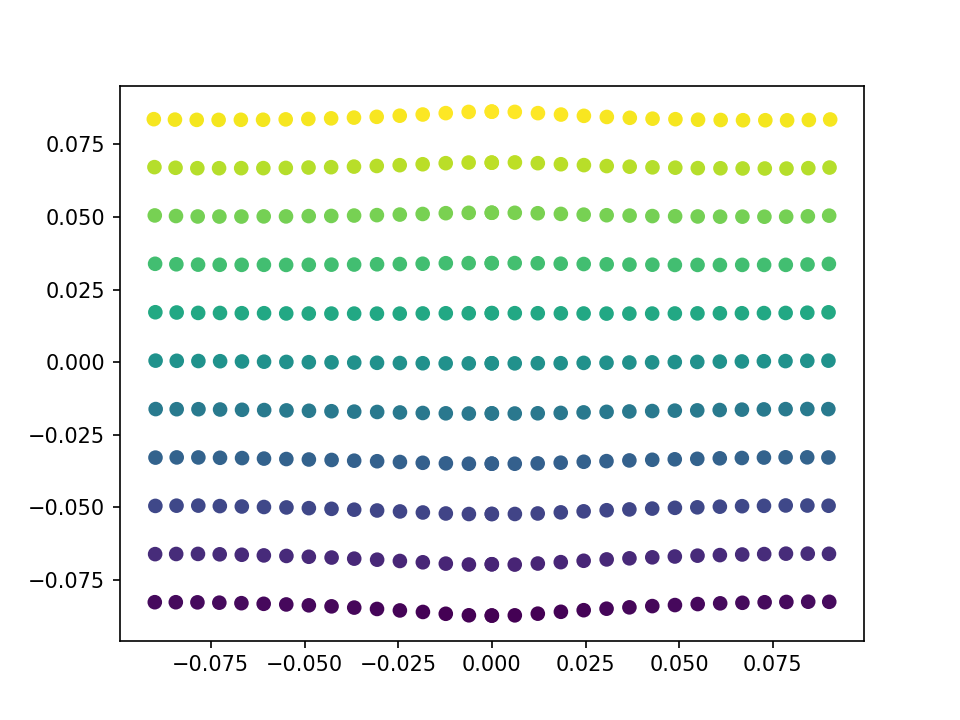

In [11]:
LLE(Scurve,k=5,d=2)

<IPython.core.display.Javascript object>


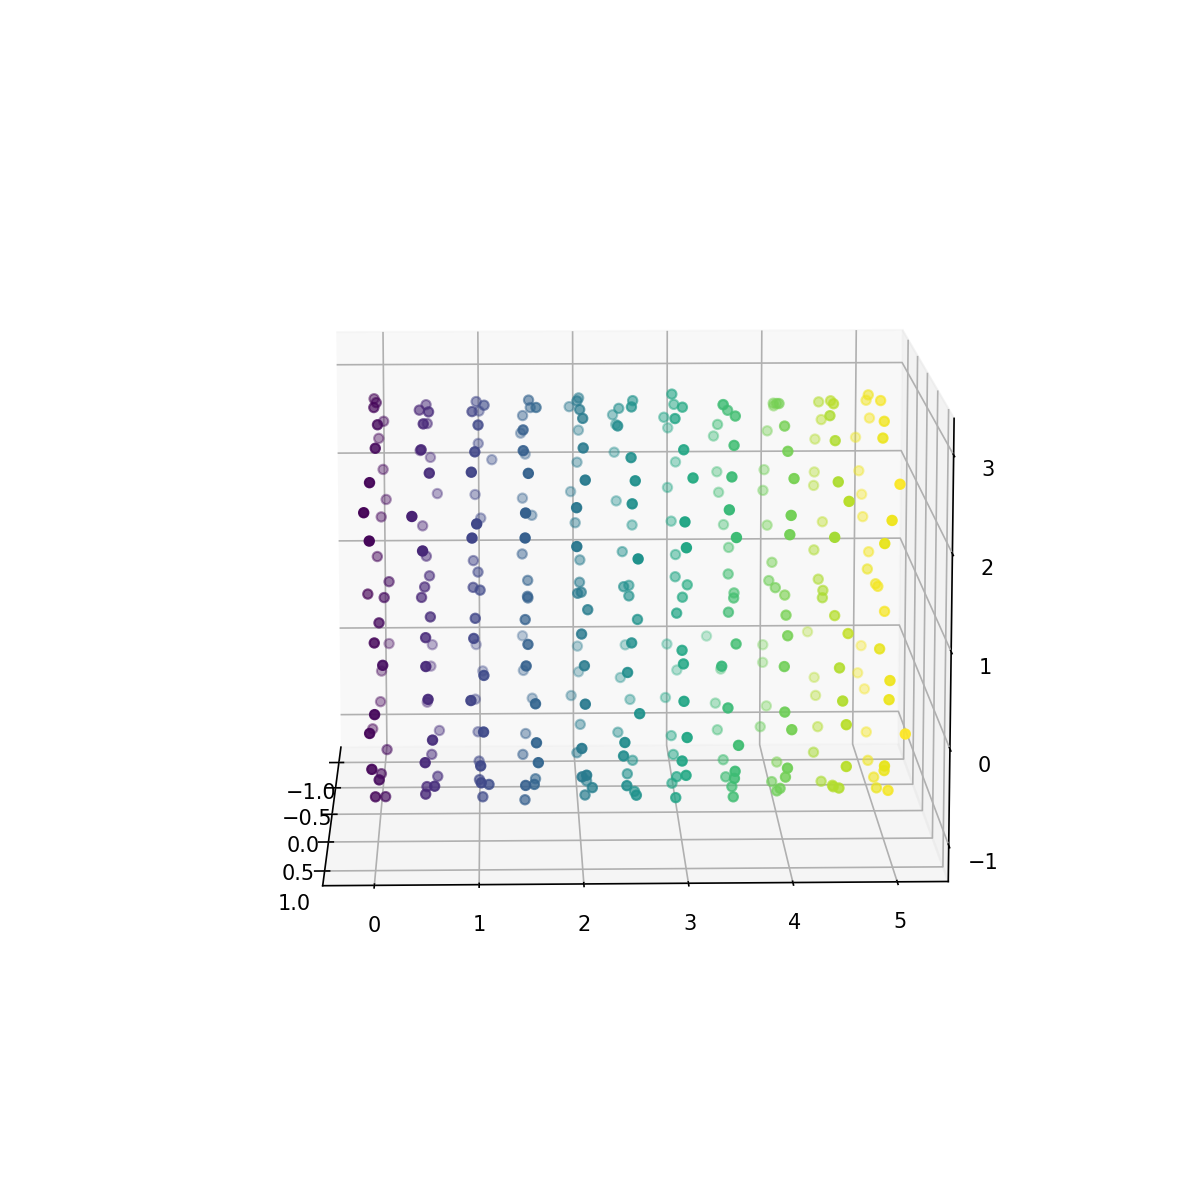

In [43]:
X_p = dScurve(0.05)
plt.close()
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter(X_p[:,0],X_p[:,1],X_p[:,2],c=X_p[:,1],cmap='viridis')

<IPython.core.display.Javascript object>


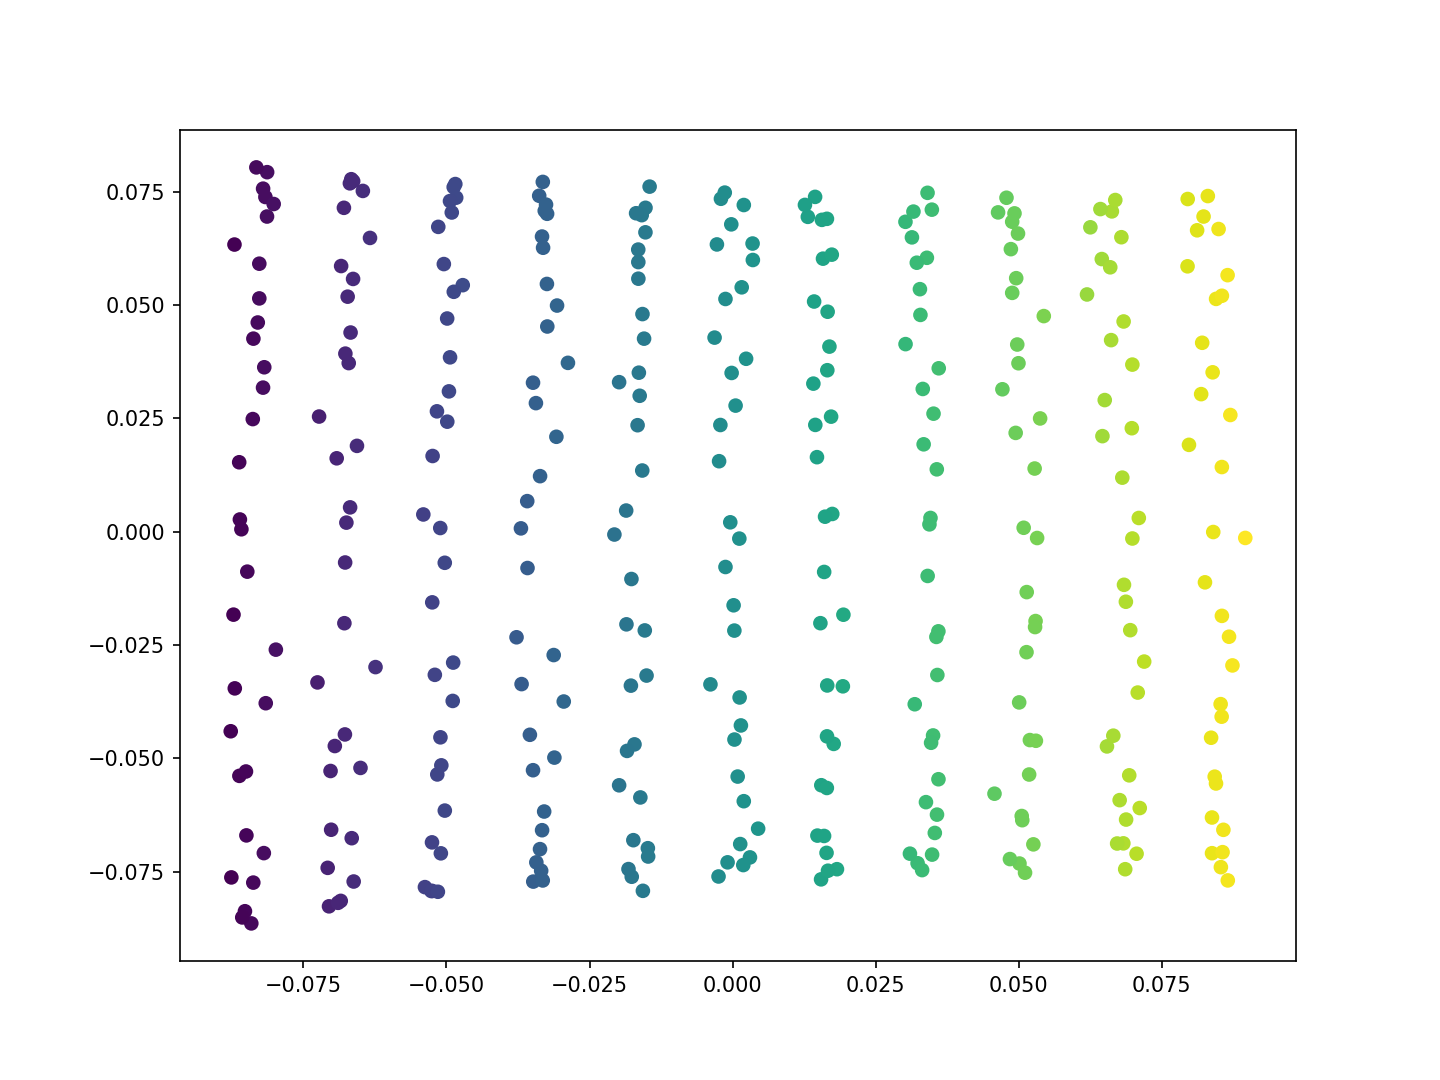

In [101]:
LLE(dScurve(0.05),k=15,d=2)

<IPython.core.display.Javascript object>


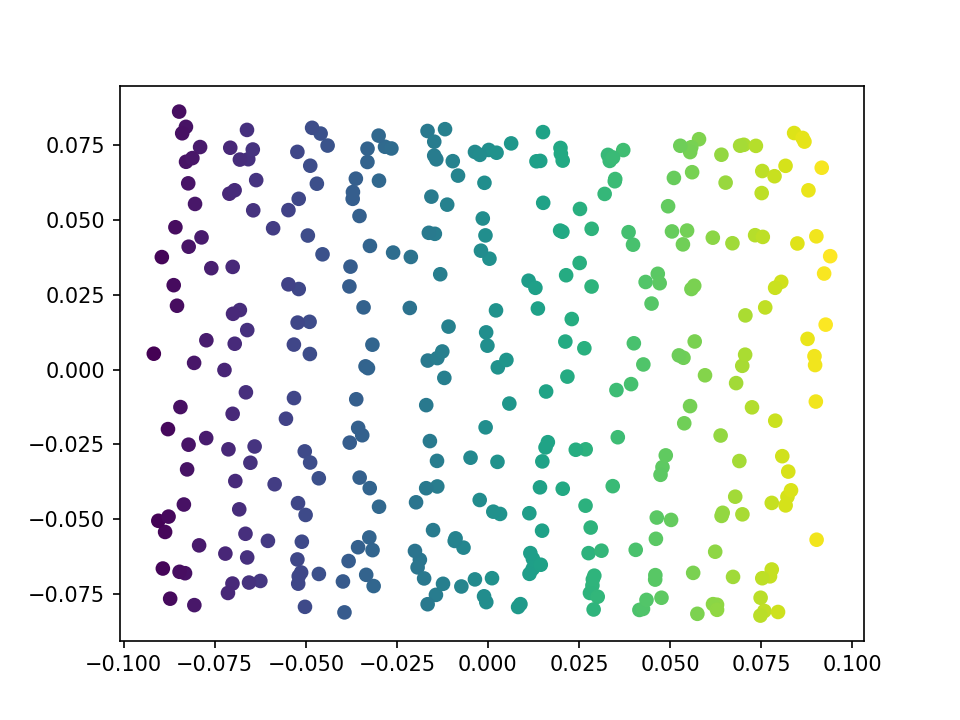

In [99]:
LLE(dScurve(0.1),k=15,d=2)

<IPython.core.display.Javascript object>


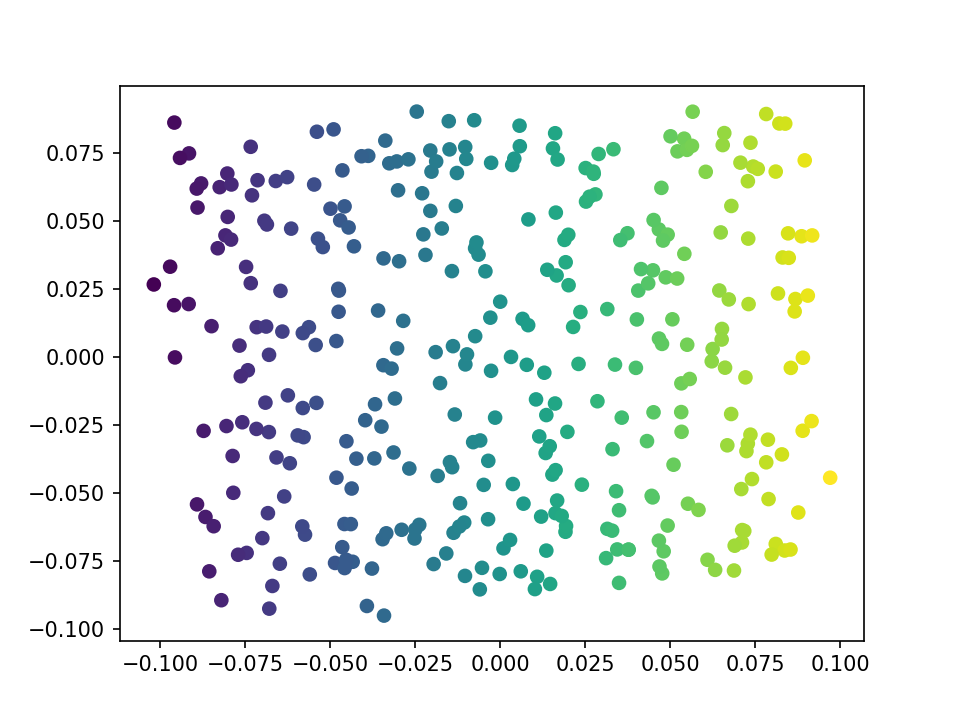

In [100]:
LLE(dScurve(0.2),k=17,d=2)

<IPython.core.display.Javascript object>


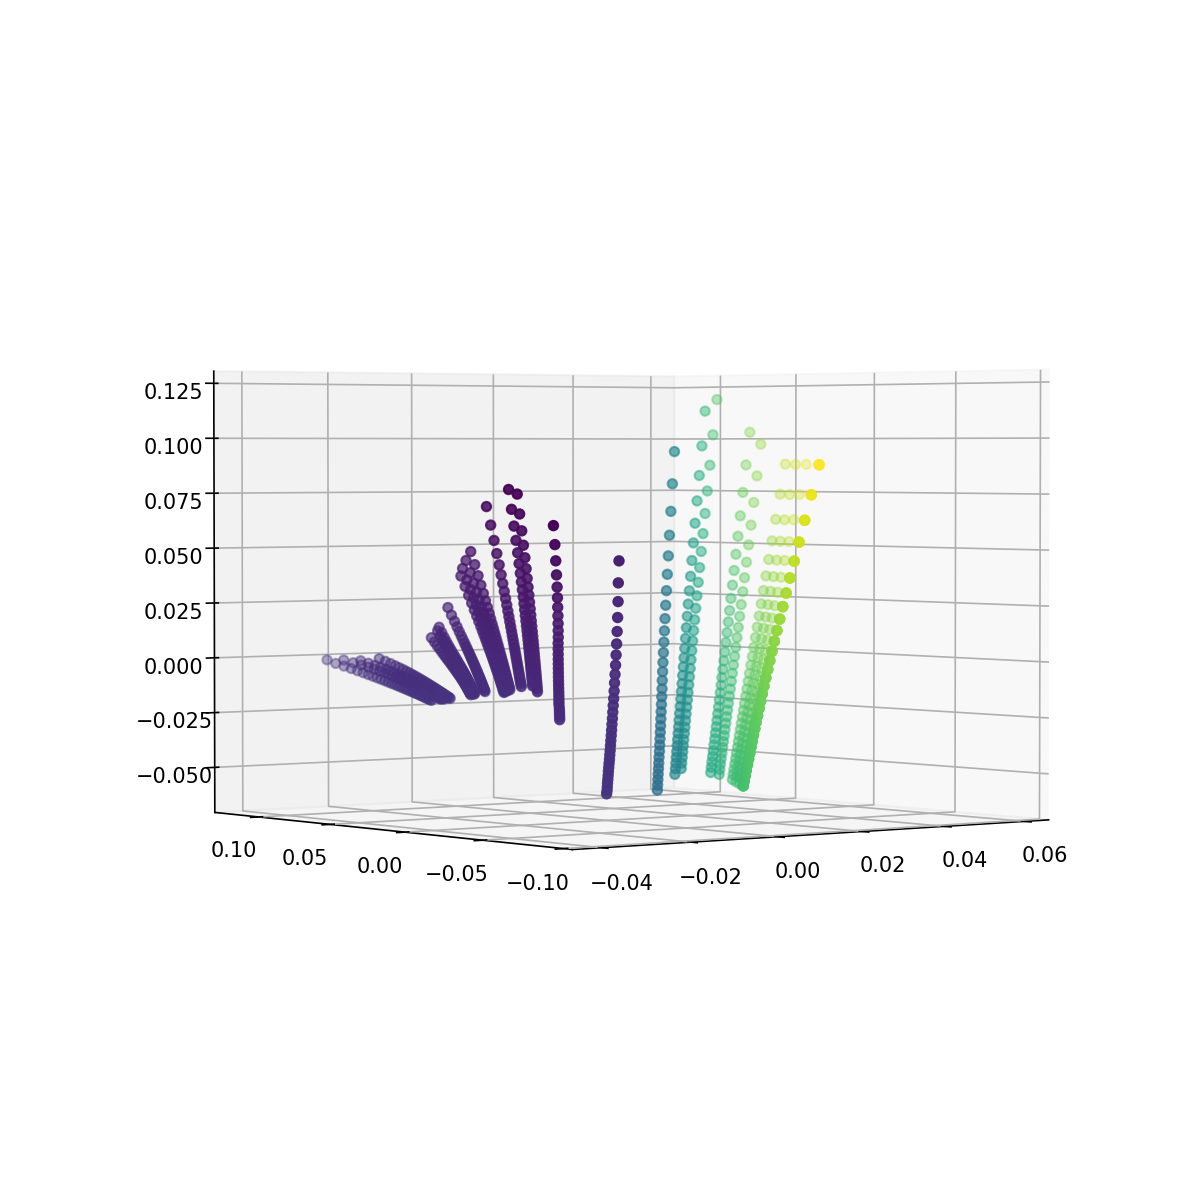

In [113]:
# face.shape
LLE(face,k=50,d=3)

<IPython.core.display.Javascript object>


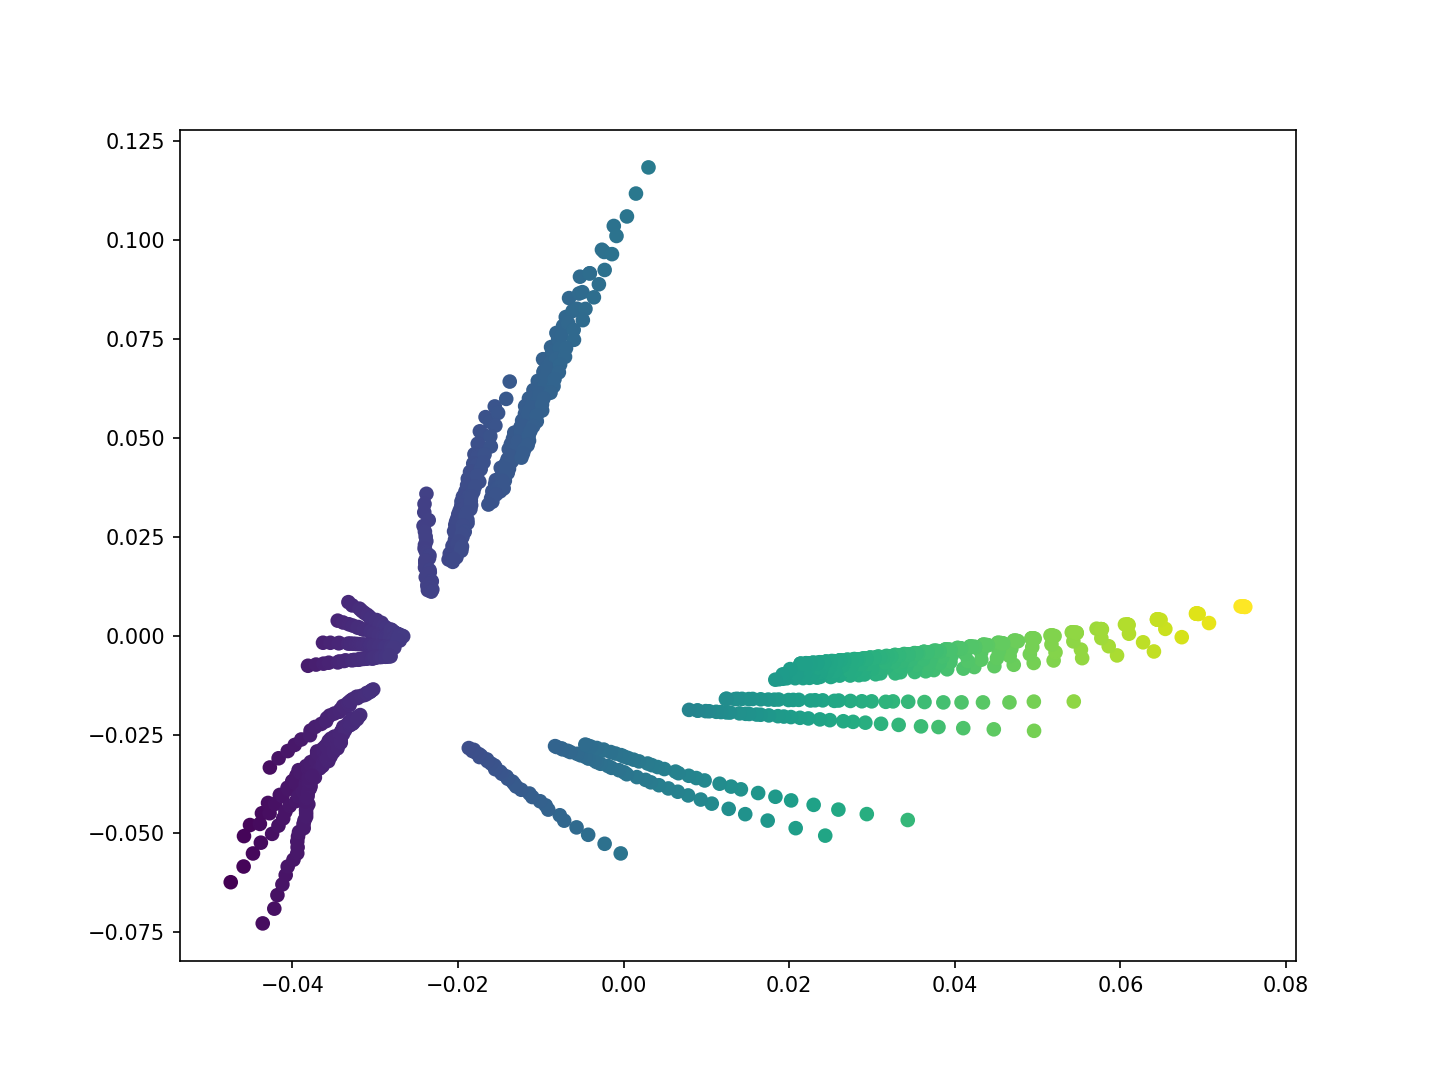

In [114]:
LLE(face,k=65,d=2)

In [107]:
## t-SNE
def tSNE(X,d,p=30,lr=200):
    tsnem = TSNE(n_components=d, perplexity=p, learning_rate=lr, init='pca')
    X_transformed = tsnem.fit_transform(X)
    plt.close()
    if d==2:
        plt.scatter(x=X_transformed[:,0],y=X_transformed[:,1],c=X_transformed[:,0],cmap='viridis')
    elif d==3:
        fig = plt.figure(figsize=(8,8))
        ax = plt.axes(projection='3d')
        ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2],c=X_transformed[:,0],cmap='viridis')
    plt.show()

<IPython.core.display.Javascript object>


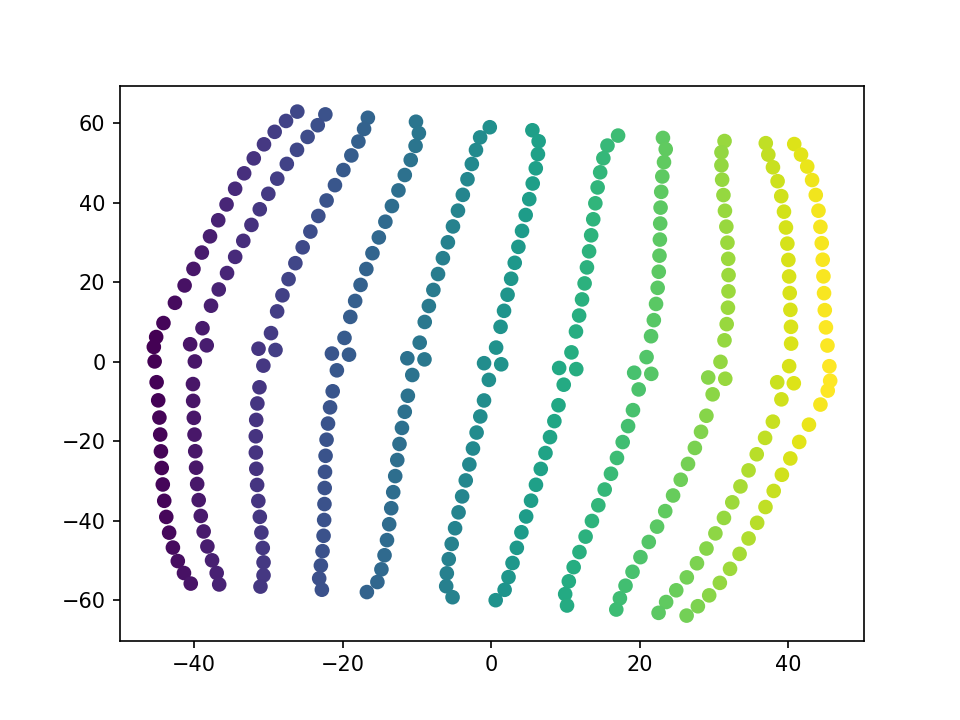

In [119]:
tSNE(Scurve,2,p=10)

<IPython.core.display.Javascript object>


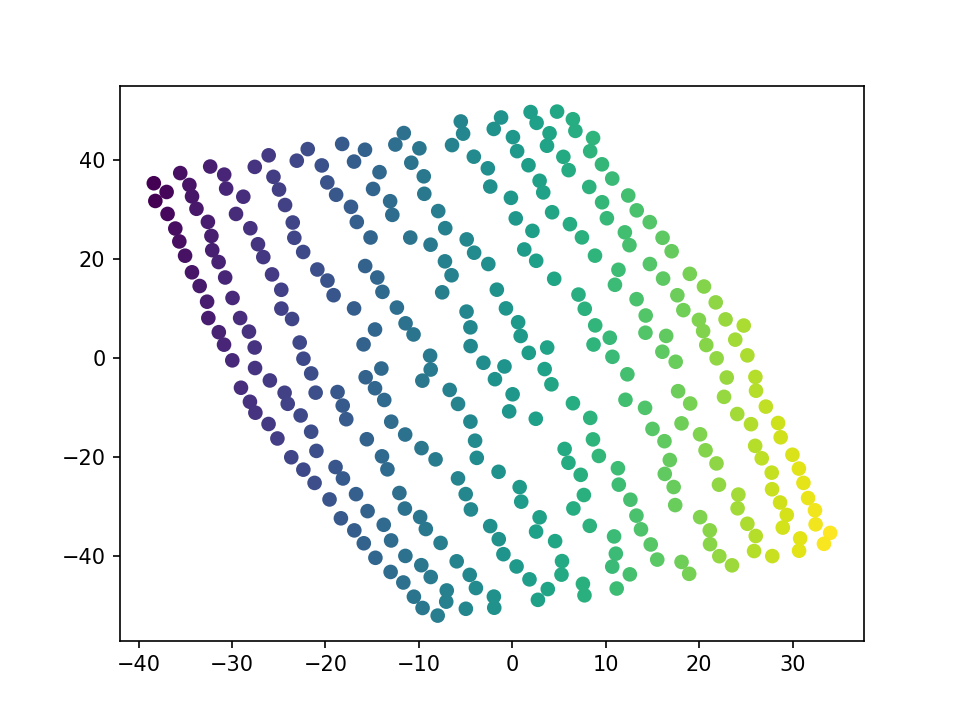

In [128]:
tSNE(dScurve(0.05),2,p=20)

<IPython.core.display.Javascript object>


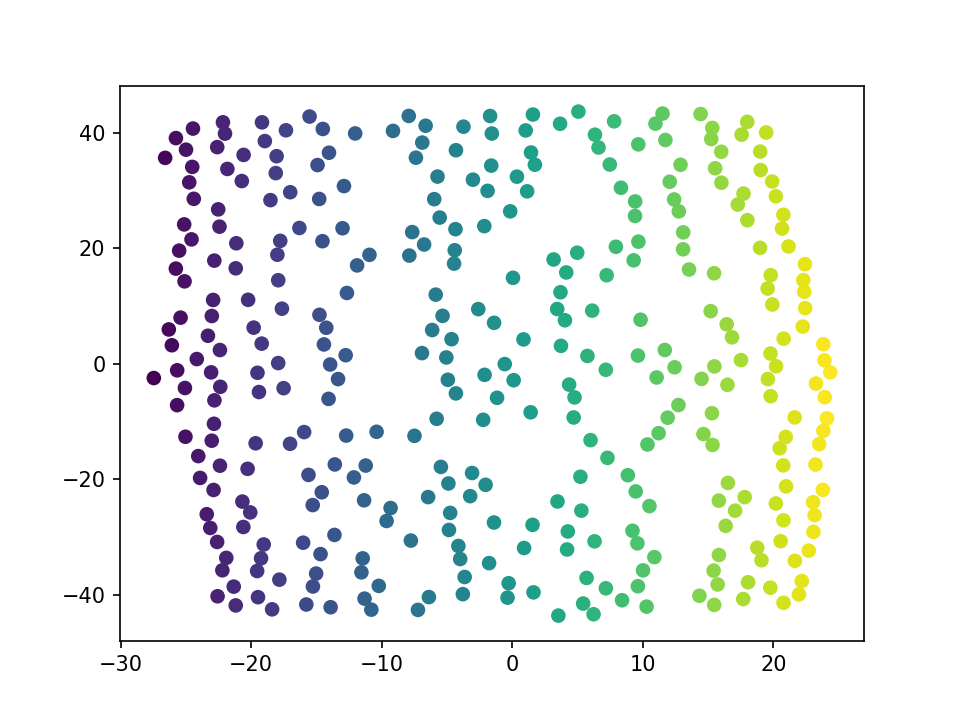

In [127]:
tSNE(dScurve(0.1),2,p=20)

<IPython.core.display.Javascript object>


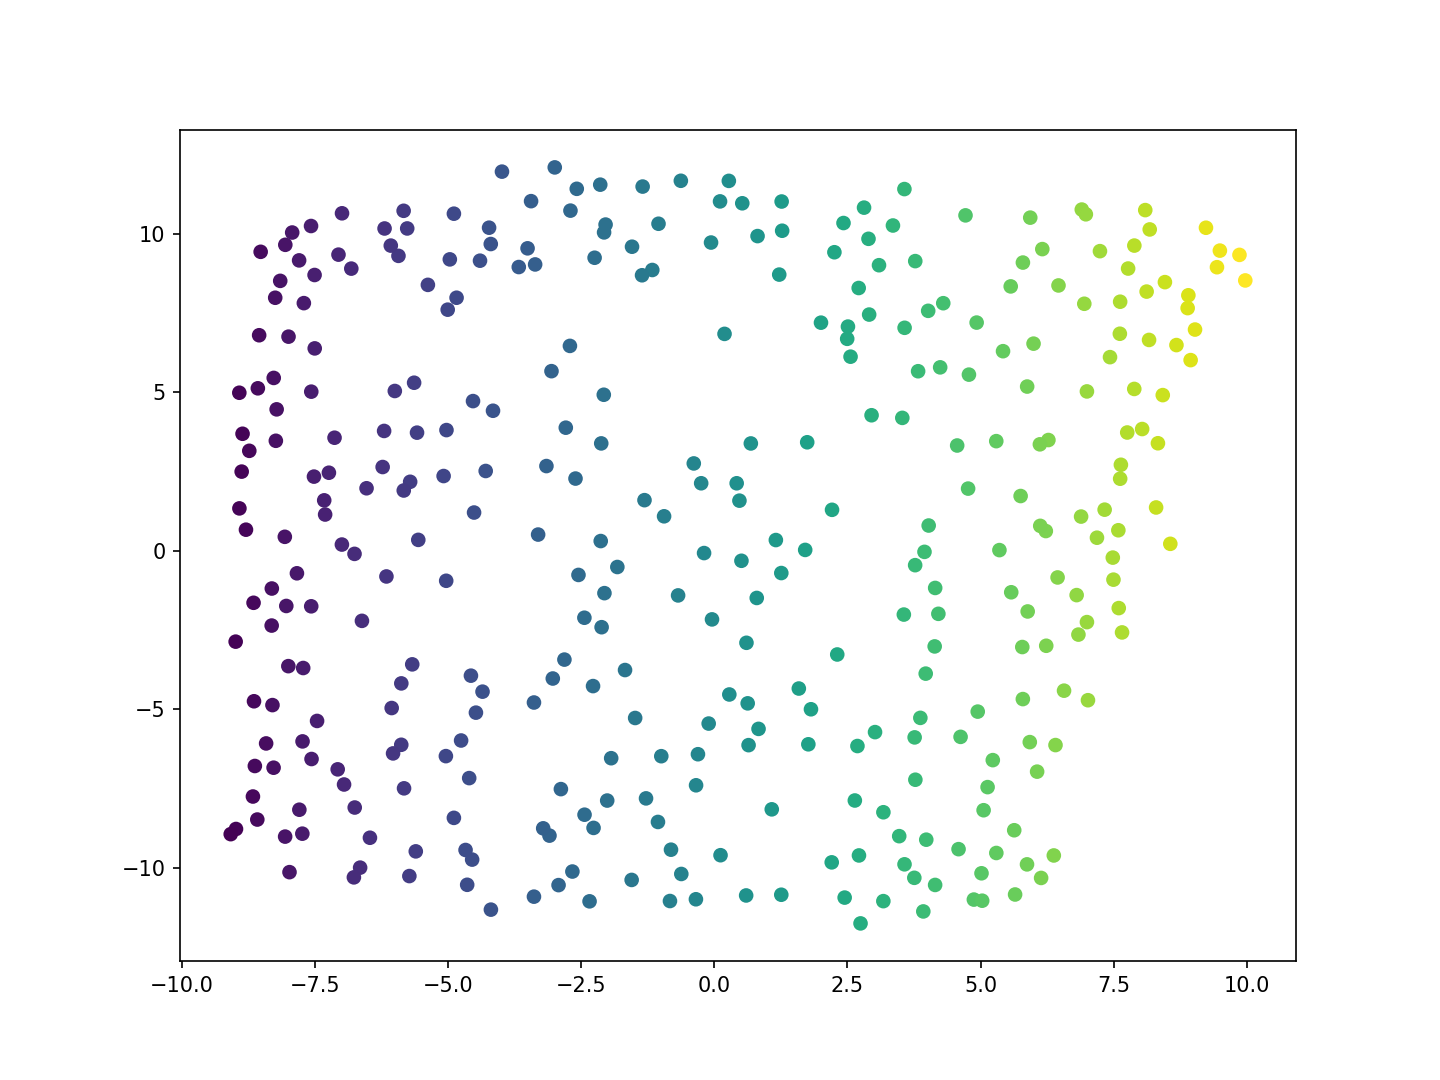

In [130]:
tSNE(dScurve(0.2),2,p=50)

<IPython.core.display.Javascript object>


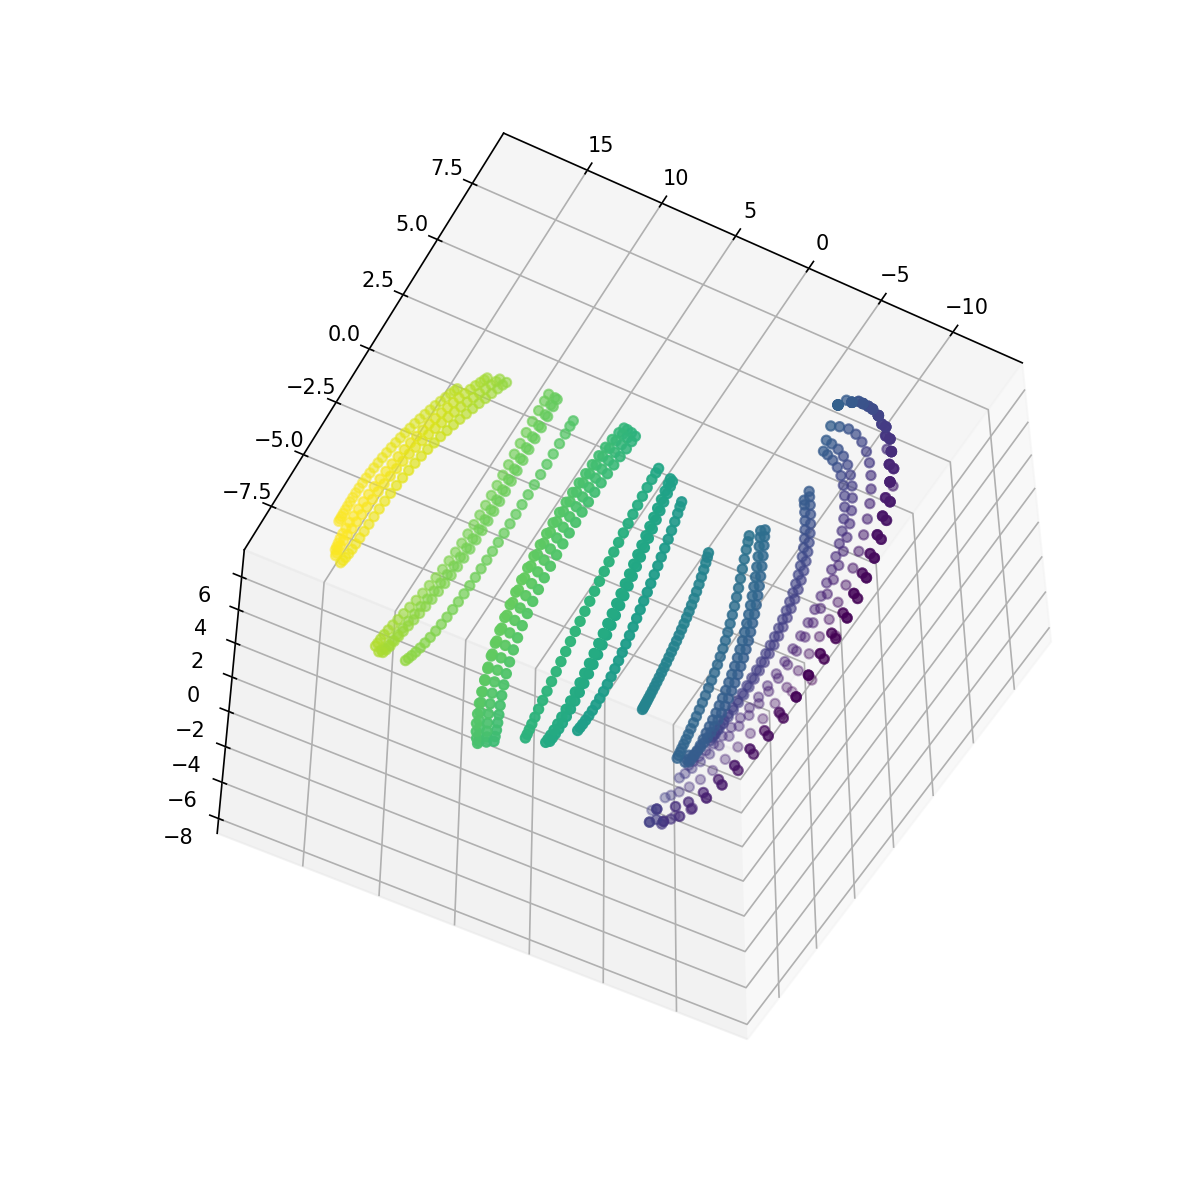

In [108]:
tSNE(face,3,p=50)

<IPython.core.display.Javascript object>


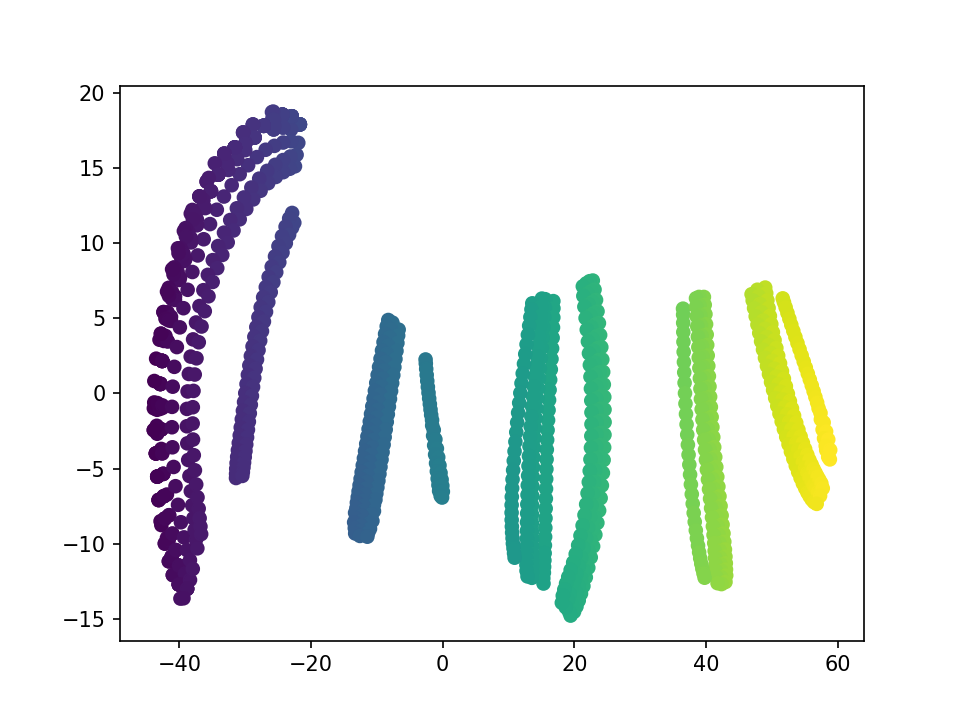

In [109]:
tSNE(face,2,p=50)

In [97]:
plt.close()